# Lab1 Titanic passangers' data analysis

# Report


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import re
import collections

### preparation part, understanding quality of given data

In [62]:
train_file = pd.read_csv('train.csv')

print(train_file.columns.values)
print('')
train_file.info()
train_file.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### As it can be seen the data is sufficiently representative. There are some problems with data format in a few columns, but, nevertheless, it will not affect to the general analysis of the data in this task

## Number of 1st class passengers 

In [63]:
print (train_file[train_file.Pclass.isnull()])
print('')
print (train_file['Pclass'].value_counts())
print('')
print ("1st class passengers = 216")

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

3    491
1    216
2    184
Name: Pclass, dtype: int64

1st class passengers = 216


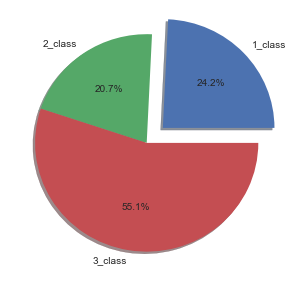

In [64]:
x1= len(train_file.groupby('Pclass').get_group(1))
x2= len(train_file.groupby('Pclass').get_group(2))
x3= len(train_file.groupby('Pclass').get_group(3))

#Pie chart
plt.figure(figsize=(5,5))
x = [x1, x2,x3]
labels = ['1_class', '2_class','3_class']
explode = [0.2, 0, 0]
plt.pie(x, labels = labels, explode = explode, autopct = '%1.1f%%', shadow=True);
plt.show()

###  there are 216 passengers in the first class, that is 24,2% of all passengers on the board.

## The most popular female name on the board

In [65]:
# the most popular female name 
train2 = train_file[['Name','Sex']]
fem = train2.sort_values(by='Sex')
fem2=fem[fem.Sex == 'female']['Name']
fem2

383    Holverson, Mrs. Alexander Oskar (Mary Aline To...
218                                Bazzani, Miss. Albina
609                            Shutes, Miss. Elizabeth W
216                               Honkanen, Miss. Eliina
215                              Newell, Miss. Madeleine
608    Laroche, Mrs. Joseph (Juliette Marie Louise La...
750                                    Wells, Miss. Joan
211                           Cameron, Miss. Clear Annie
747                                Sinkkonen, Miss. Anna
402                             Jussila, Miss. Mari Aina
208                            Carr, Miss. Helen "Ellen"
754                     Herman, Mrs. Samuel (Jane Laver)
458                                  Toomey, Miss. Ellen
205                           Strom, Miss. Telma Matilda
641                                 Sagesser, Mlle. Emma
345                        Brown, Miss. Amelia "Mildred"
346                            Smith, Miss. Marion Elsie
457                    Kenyon, 

In [66]:
# using regular expressions it will be left only first ladys' names
fem3=['']

for i in fem2:
 result1 = re.search(r'Miss', i)
 if result1:
  result = re.split(r'\s', i)
  fem3.insert(0,result[2])
 else:
   result = re.findall(r'[(](\w+)',i)   
   fem3=fem3+result 
   
fem4=collections.Counter(fem3)
fem4.most_common()


[('Anna', 15),
 ('Mary', 14),
 ('Elizabeth', 11),
 ('Margaret', 10),
 ('Alice', 6),
 ('Helen', 5),
 ('Maria', 5),
 ('Bertha', 5),
 ('Ellen', 4),
 ('Catherine', 4),
 ('Annie', 4),
 ('Ada', 4),
 ('Marie', 4),
 ('Emily', 4),
 ('Edith', 3),
 ('Lillian', 3),
 ('Augusta', 3),
 ('Madeleine', 3),
 ('Marion', 3),
 ('Kate', 3),
 ('Jane', 3),
 ('Elisabeth', 3),
 ('Katherine', 3),
 ('Florence', 3),
 ('Amelia', 3),
 ('Hanora', 3),
 ('Ida', 3),
 ('Miss.', 2),
 ('Charlotte', 2),
 ('Mathilde', 2),
 ('Martha', 2),
 ('Rosalie', 2),
 ('Susan', 2),
 ('Elsie', 2),
 ('Lucile', 2),
 ('Constance', 2),
 ('Agnes', 2),
 ('Ethel', 2),
 ('Dorothy', 2),
 ('Bridget', 2),
 ('Lily', 2),
 ('Marija', 2),
 ('Johanna', 2),
 ('Rosa', 2),
 ('Marjorie', 2),
 ('Adele', 2),
 ('Helene', 2),
 ('Jessie', 2),
 ('Clara', 2),
 ('Amy', 2),
 ('Lucy', 2),
 ('Hedwig', 2),
 ('Mabel', 2),
 ('', 1),
 ('Edwina', 1),
 ('Saiide', 1),
 ('Hildur', 1),
 ('Anne', 1),
 ('Grace', 1),
 ('Jean', 1),
 ('Vera', 1),
 ('Sigrid', 1),
 ('Leah', 1),
 ('Myna

### the most common name is "Mary" - 15 women on the board

## Titles and classes

In [67]:
# Titles and Classes
# using the same procedure as before...

##aggregate, count,groupby
train3 = train_file[['Pclass','Name']]
t = train3.sort_values(by='Pclass')
t2=t[t.Pclass == 1]['Name']
t2
tit1=['']
for i in t2:
  result1 = re.split(r'[,.]',i )
  tit1.insert(0,result1[1])
tit1
print ('In the 1st class there are such titles:')
tit2=collections.Counter(tit1)
print (tit2.most_common())
print('')
###

tt = train3.sort_values(by='Pclass')
tt2=tt[tt.Pclass == 2]['Name']
tt2
titt1=['']
for i in tt2:
  resultt1 = re.split(r'[,.]',i )
  titt1.insert(0,resultt1[1])
titt1
print ('In the 2nd class there are such titles:')
titt2=collections.Counter(titt1)
print(titt2.most_common())
print('')
#########
ttt = train3.sort_values(by='Pclass')
ttt2=ttt[ttt.Pclass == 3]['Name']
tt2
tittt1=['']
for i in ttt2:
  resulttt1 = re.split(r'[,.]',i )
  tittt1.insert(0,resulttt1[1])
tittt1

print ('In the 3rd class there are such titles:')
tittt2=collections.Counter(tittt1)
print(tittt2.most_common())

In the 1st class there are such titles:
[(' Mr', 107), (' Miss', 46), (' Mrs', 42), (' Dr', 5), (' Master', 3), (' Major', 2), (' Mlle', 2), (' Col', 2), ('', 1), (' the Countess', 1), (' Don', 1), (' Sir', 1), (' Capt', 1), (' Lady', 1), (' Jonkheer', 1), (' Mme', 1)]

In the 2nd class there are such titles:
[(' Mr', 91), (' Mrs', 41), (' Miss', 34), (' Master', 9), (' Rev', 6), (' Dr', 2), ('', 1), (' Ms', 1)]

In the 3rd class there are such titles:
[(' Mr', 319), (' Miss', 102), (' Mrs', 42), (' Master', 28), ('', 1)]


###

      1st        2nd          3rd
       
Mr.       107    |    91     | 319

Miss       46    |    34     | 102

Mrs        42    |    41     | 42
 
Dr         5     |    2      |

Master     3     |    9      | 28

Major      2

Don        1

Capt       1

Sir        1

Mme        1

Lady       1

Jonkheer   1

## Survived part of passengers

0    549
1    342
Name: Survived, dtype: int64

"1" - survived,  "0" - no
('survived: ', 0)


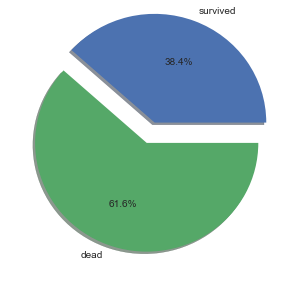

In [68]:
#6 Survived part of passengers
print (train_file['Survived'].value_counts())
print('')
print ('"1" - survived,  "0" - no')

surv=len(train_file.groupby('Survived').get_group(1))
dead=len(train_file.groupby('Survived').get_group(0))
total=surv+dead
ans=surv/total*100
print ('survived: ',ans)

#Pie chart
plt.figure(figsize=(5,5))
x = [surv, dead]
labels = ['survived', 'dead']
explode = [0.2, 0]
plt.pie(x, labels = labels, explode = explode, autopct = '%1.1f%%', shadow=True);
plt.show()

### there are 342 survived passengers and it is 38,4%

## Variety of tickets cost

In [69]:
# Variety of ticket cost
y=train_file['Fare'].value_counts()
y

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, dtype: int64

#### let's calculate the main characteristics, such as :

In [70]:
max(train_file.Fare) 
min(train_file.Fare)
print ("mean=",np.mean(train_file.Fare))
print ("standart_deviation=", np.std(train_file.Fare))
print ("Median=", np.median(train_file.Fare))

('mean=', 32.2042079685746)
('standart_deviation=', 49.66553444477411)
('Median=', 14.4542)


###  - there is a variety of tickets' cost

### Are there any relationships between the probability of survival and the tickets price?  (the more expensive tickets - the higher probability to survive)

In [71]:
classes= train_file.groupby(['Pclass', 'Survived']).size().unstack()
print (classes)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


#### consider the higher class is - the more expensive ticket

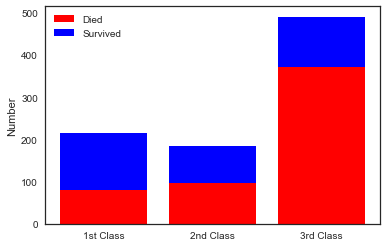

In [72]:
plt.bar([0, 1, 2], classes[0], color='red', label='Died')
plt.bar([0, 1, 2], classes[1], bottom=classes[0], color='blue', label='Survived')

plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')

plt.ylabel("Number")
plt.legend()

### there is quite a clear bar-graph that shows that survivors are dominated in the first class, with high probability the first class has a priority line for lifeboats.

## Females survived more friquently then mens

In [73]:
y= train_file.groupby(['Sex', 'Survived']).size().unstack()
print (y)


Survived    0    1
Sex               
female     81  233
male      468  109


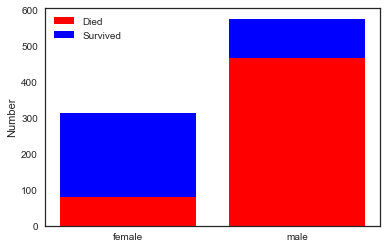

In [74]:
plt.bar([0, 1], y[0], color='red', label='Died')
plt.bar([0, 1], y[1], bottom=y[0], color='blue', label='Survived')

plt.xticks([0, 1], ['female', 'male'], rotation='horizontal')

plt.ylabel("Number")
plt.legend()

### this bar-graph presents the ratio of dead and surviving of male and female
obviously, the number of female survivors exceed the male ones.

# Conclusion


The first lab based on Titanic data set gives a possibility to deal with some Python libraries. The first steps required much time to look for information and , such practice gives possibility to orientate in basic commands in libraries.

#  08.04 
### question about correlation of siblings and children/parents


In [75]:
import seaborn as sns
sns.set(style="white")

# Compute the correlation matrix with panda
c=train_file.corr()
c

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [76]:
corr = train_file['SibSp'].corr(train_file['Parch'])
print (5, "{:0.2f}".format(corr))

(5, '0.41')


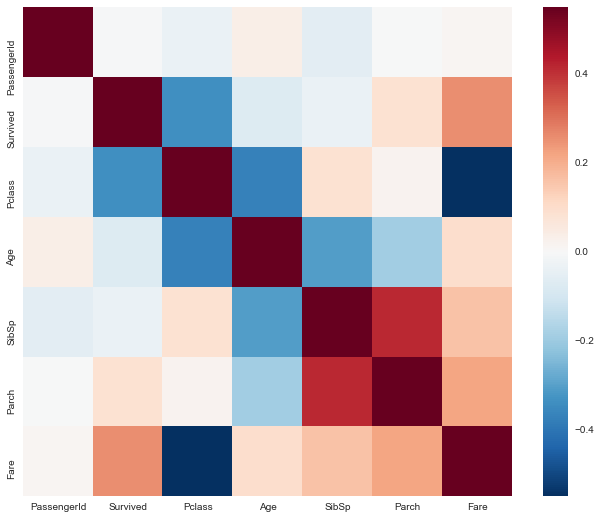

In [77]:
# Generate a mask for the upper triangle
mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c, vmax=.31,square=True)

plt.show()

this correlation matrix shows the strength in connections between different columns. from blue to brown there is a degree of strength. number of siblings and parents/kids is red (0.414838). so it is quite high correlation.

# 29.05

# Titles and classes without cycles

In [78]:
n=train_file
n.Name=map(lambda x: x.split(",")[1].split(".")[0][1:], train_file.Name)
n.groupby(["Name", "Pclass"]).size()

Name          Pclass
Capt          1           1
Col           1           2
Don           1           1
Dr            1           5
              2           2
Jonkheer      1           1
Lady          1           1
Major         1           2
Master        1           3
              2           9
              3          28
Miss          1          46
              2          34
              3         102
Mlle          1           2
Mme           1           1
Mr            1         107
              2          91
              3         319
Mrs           1          42
              2          41
              3          42
Ms            2           1
Rev           2           6
Sir           1           1
the Countess  1           1
dtype: int64